In [1]:
from diffusion_map import *

## Part one: 
Use the algorithm to demonstrate the similarity of Diffusion Maps and Fourier analysis. To do
this, compute five eigenfunctions ϕl associated to the largest eigenvalues λl with Diffusion Maps, on a periodic
data set with N = 1000 points.

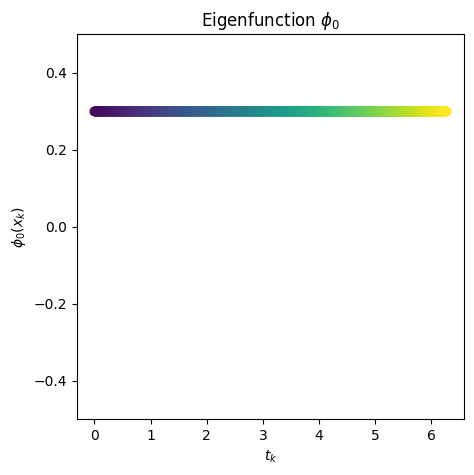

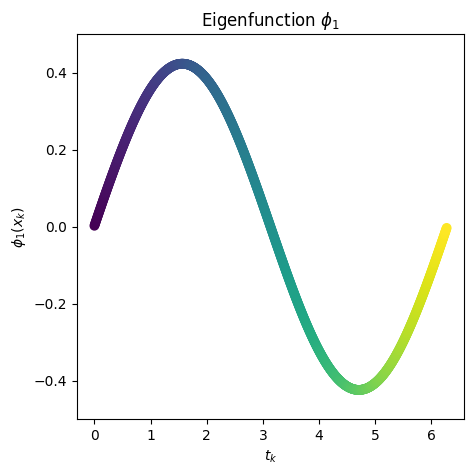

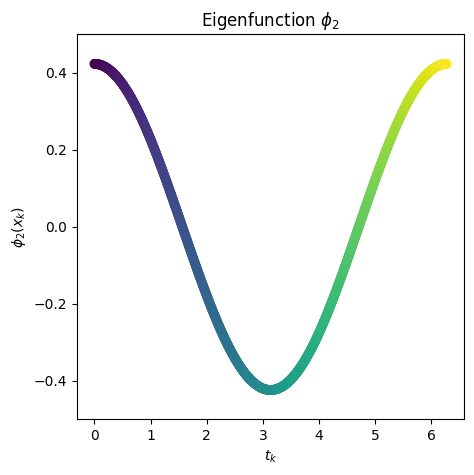

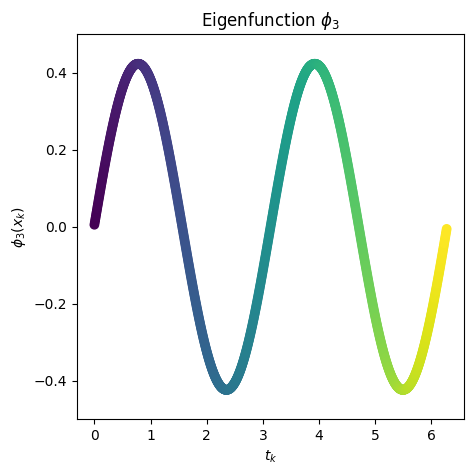

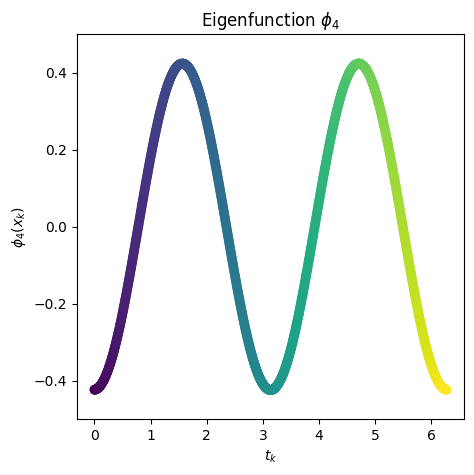

In [2]:
#Create the dataset for part one of task 2
x_periodic, t_periodic = create_periodic_data()
radius = 0.009 #Appropriate radius
L = 5 #First 5 eigenfunctions

#Compute the diffusion map for the dataset
lambda_values, phi = diffusion_map(x_periodic, L = L)

#Plot the eigenfunctions against t_k
plot_eigenfunctions(phi, t_periodic, L, save=True, filename="eigenfunctions_periodic", task=1)

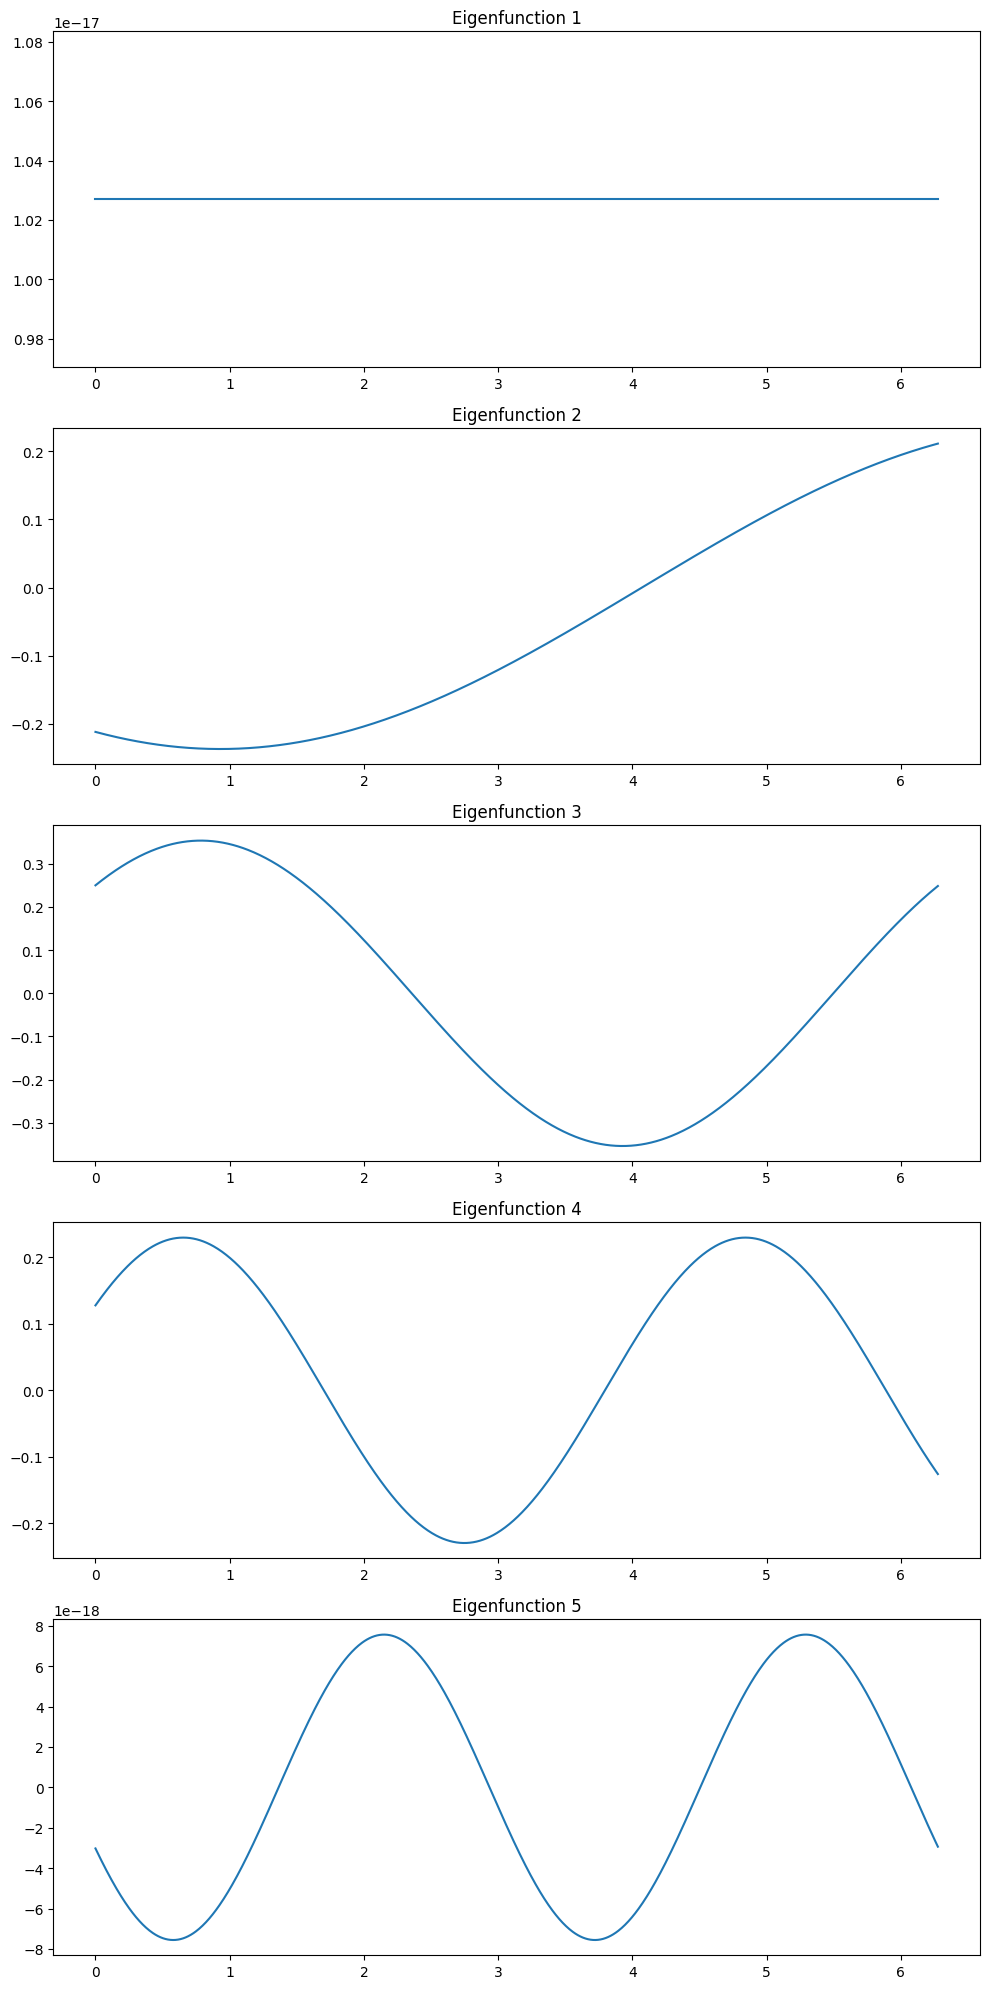

In [6]:
N = 1000
t = np.linspace(0, 2*np.pi, N, endpoint=False) # tk = (2πk)/(N + 1)

# xk = (cos(tk), sin(tk)), and then reshape X to be a 1D array
X = np.array([np.cos(t), np.sin(t)]).reshape(-1)

# Computing FFT
fft_result = np.fft.fft(X)

# Extracting the first 5 components and their inverse FFTs (the "eigenfunctions")
eigenvalues = fft_result[:5]
eigenfunctions = [np.fft.ifft(fft_result * (fft_result == ev)) for ev in eigenvalues]

# Plotting
fig, axs = plt.subplots(5, figsize=(10, 20))

for i in range(5):
    axs[i].plot(t, np.real(eigenfunctions[i][:N]))  # Only take the real part, and only plot against the first N points
    axs[i].set_title('Eigenfunction ' + str(i+1))

plt.tight_layout()
plt.show()

## Part two: 
Use the algorithm to obtain the first ten eigenfunctions of the Laplace Beltrami operator on the
“swiss roll” manifold with 5000 data points.

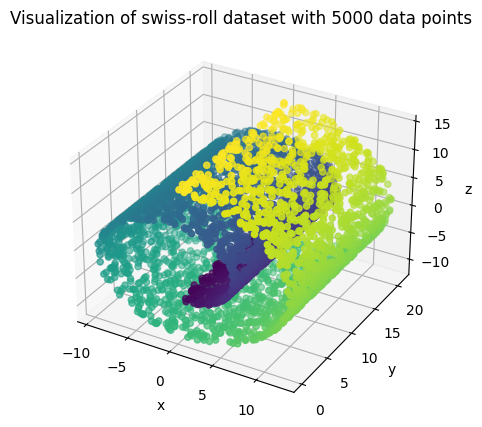

In [7]:
#Create swiss roll data for part two of task 2
x_swiss_roll, t_swiss_roll = create_swiss_roll_data(N=5000)

#Visualize the swiss roll data
plot_3d_data(x_swiss_roll, t_swiss_roll, save=True, title = 'Visualization of swiss-roll dataset with 5000 data points', filename="swiss_roll_data_5000")

Compute eigenfunctions and plot it against phi_1

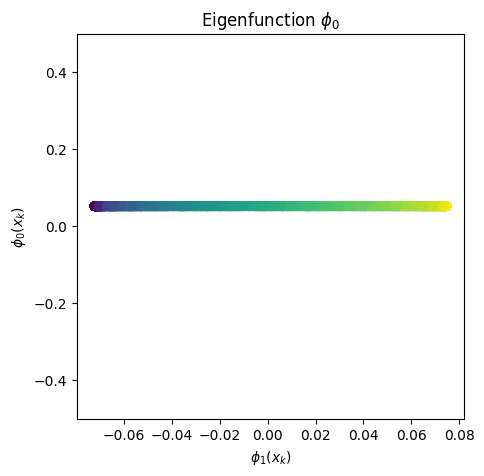

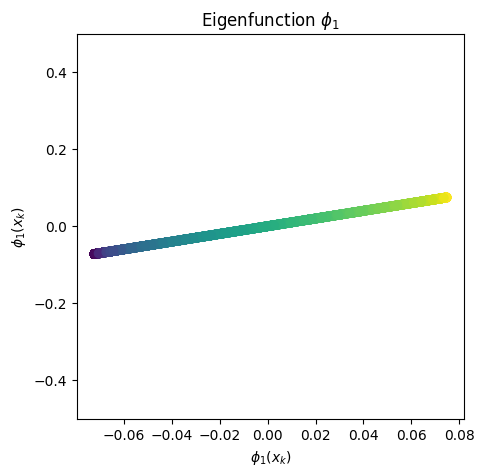

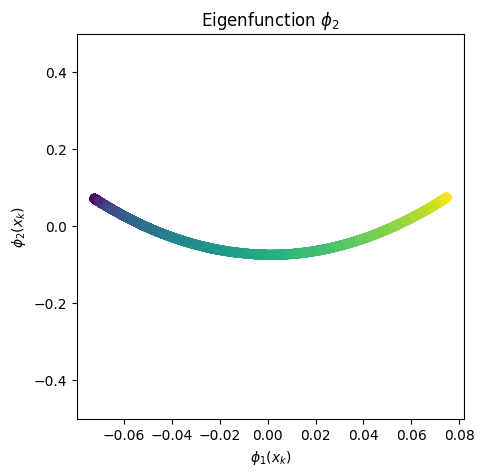

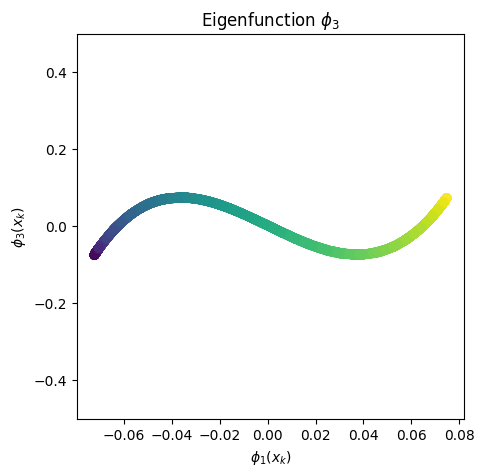

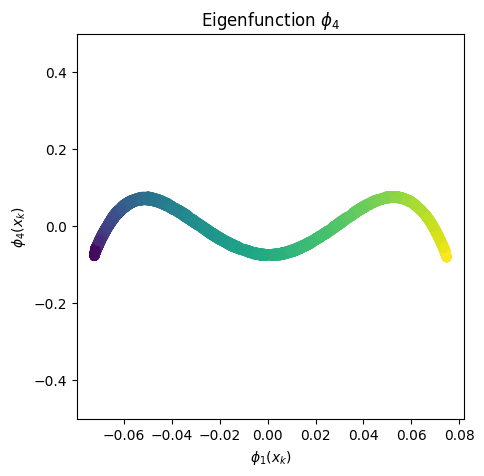

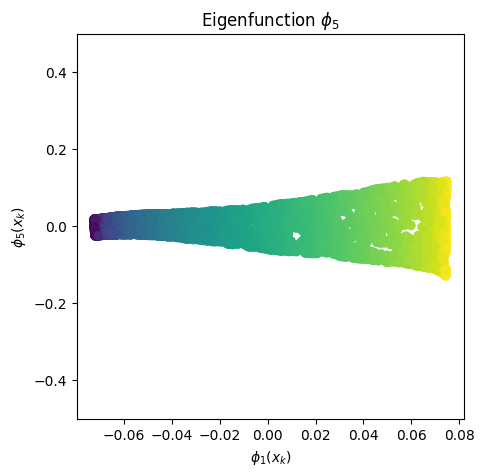

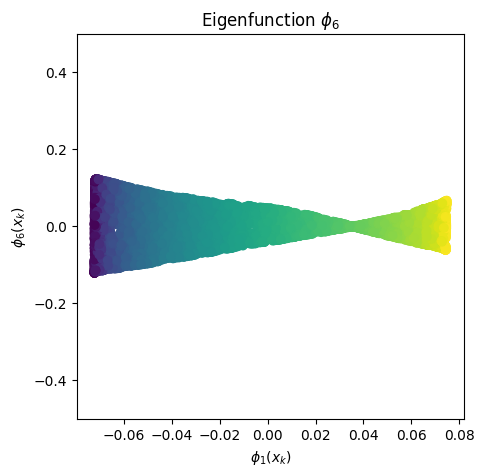

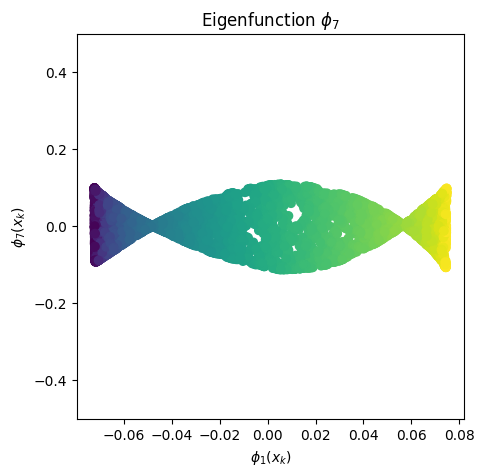

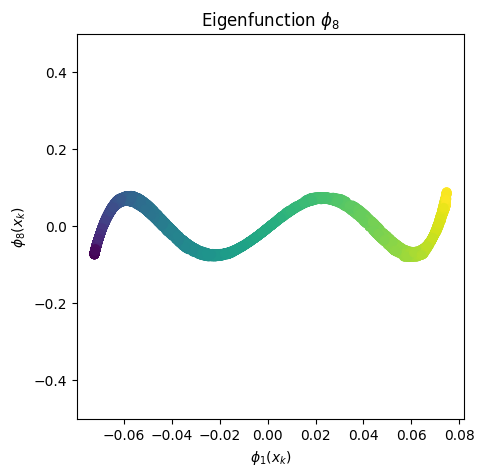

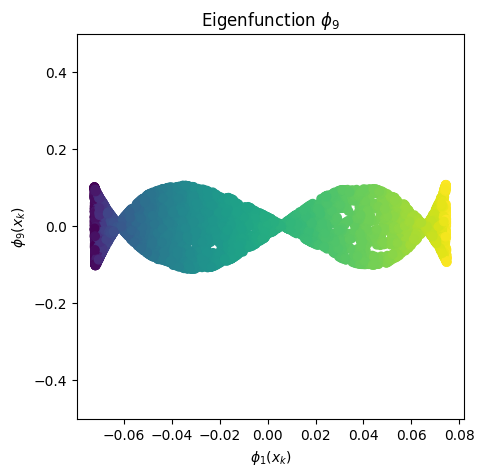

In [8]:
L = 10 #First 10 eigenvalues and eigenvectors
lambda_values, phi = diffusion_map(x_swiss_roll, L = L)

#Plot the eigenfunctions against phi_1
plot_eigenfunctions(phi, t_swiss_roll, L, save=True, filename="eigenfunctions_swiss_roll_5000", task=2)

Compute the three and two principal components of the swiss-roll dataset, and plot the reconstructed dataset, with 5000 data points.

Explained variance ratio for PC1: 0.3983
Explained variance ratio for PC2: 0.3178
Explained variance ratio for PC3: 0.2839


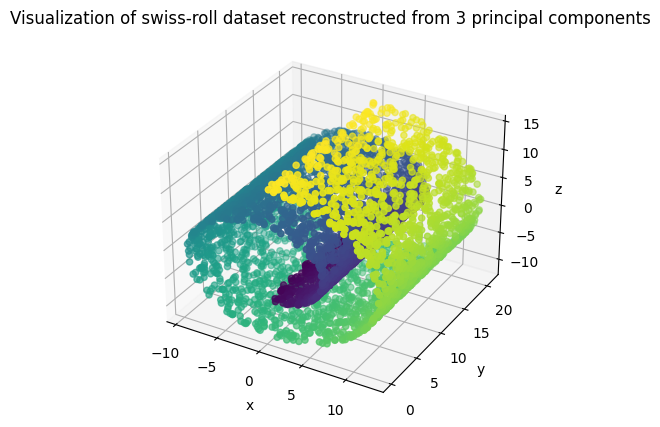

Explained variance ratio for PC1: 0.3983
Explained variance ratio for PC2: 0.3178


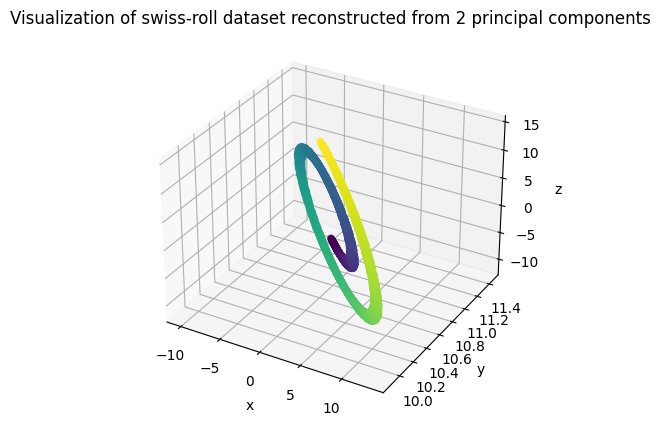

In [10]:
# Compute 3 principal components of the data set using PCA and reconstruct the data set
x_reconstructed = get_reconstructed_data_from_pca(x_swiss_roll, 3)

#Plot of the reconstructed data set
plot_3d_data(x_reconstructed, t_swiss_roll, title = 'Visualization of swiss-roll dataset reconstructed from 3 principal components', save=True, filename="reconstructed_swiss_roll_data_5000_3pc")

# Compute 2 principal components of the data set using PCA and reconstruct the data set
x_reconstructed = get_reconstructed_data_from_pca(x_swiss_roll, 2)

#Plot of the reconstructed data set
plot_3d_data(x_reconstructed, t_swiss_roll, title = 'Visualization of swiss-roll dataset reconstructed from 2 principal components', save=True, filename="reconstructed_swiss_roll_data_5000_2pc")

Create “swiss roll” manifold with 1000 data points.

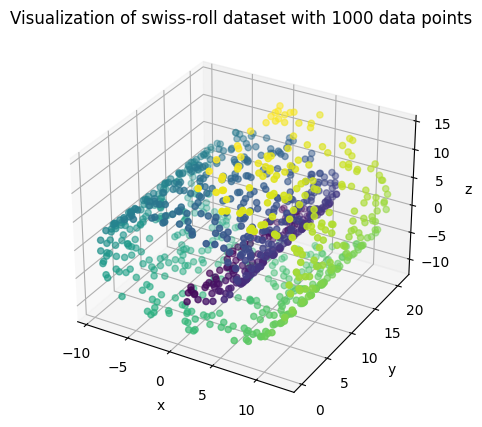

In [11]:
# Create swiss roll data for part two of task 2 with 1000 data points
x_swiss_roll_1000, t_swiss_roll_1000 = create_swiss_roll_data(N=1000)

# Plot the swiss roll data with 1000 data points
plot_3d_data(x_swiss_roll_1000, t_swiss_roll_1000, title= 'Visualization of swiss-roll dataset with 1000 data points', save=True, filename="swiss_roll_data_1000")

Compute eigenfunctions for swiss-roll dataset with 1000 data points, and plot.

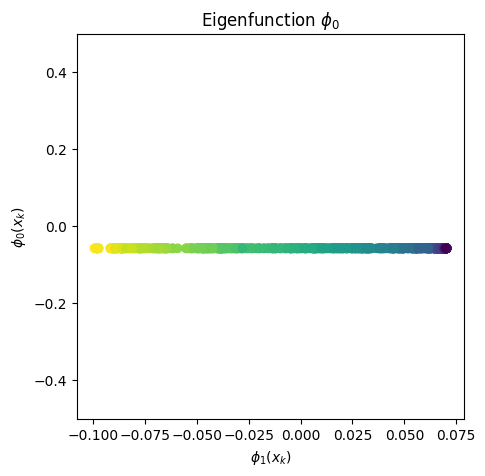

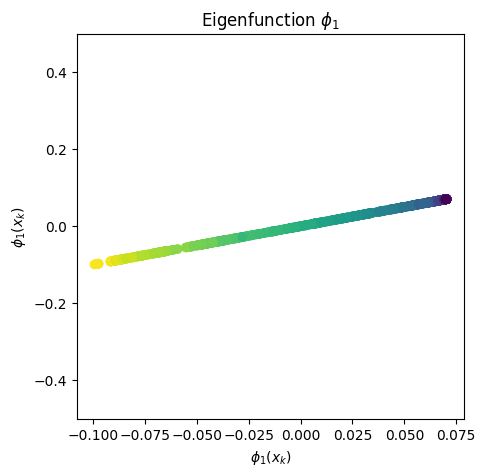

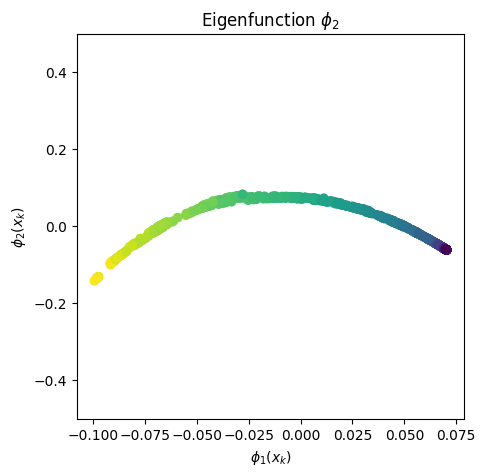

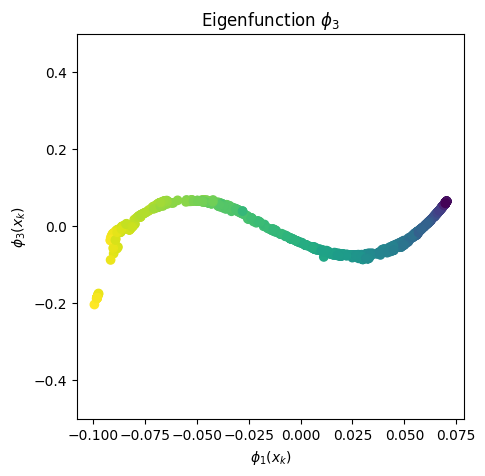

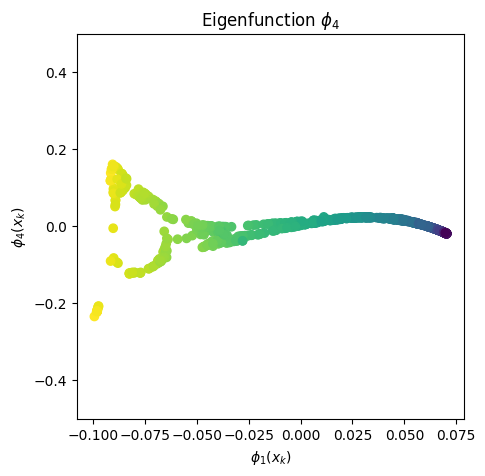

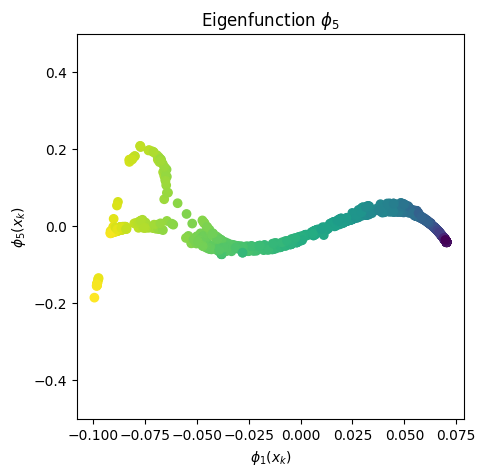

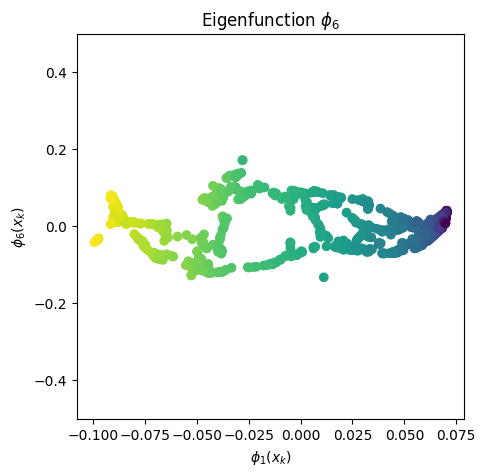

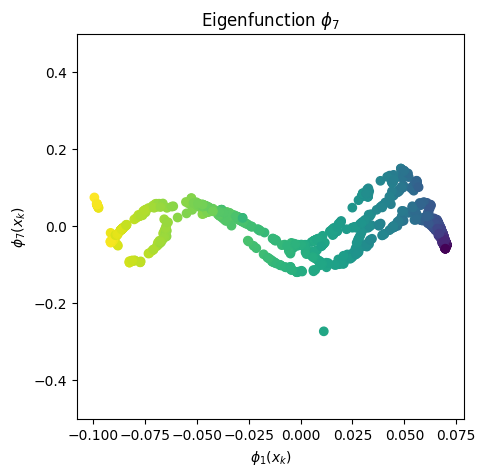

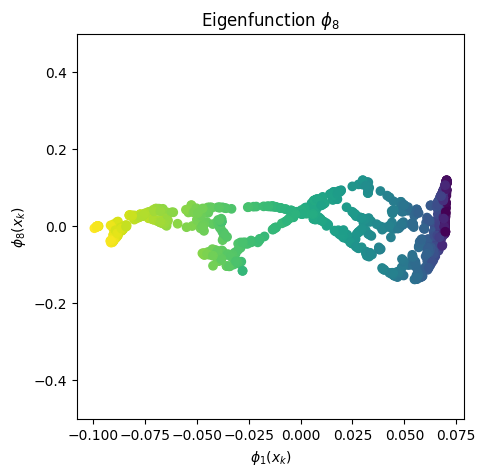

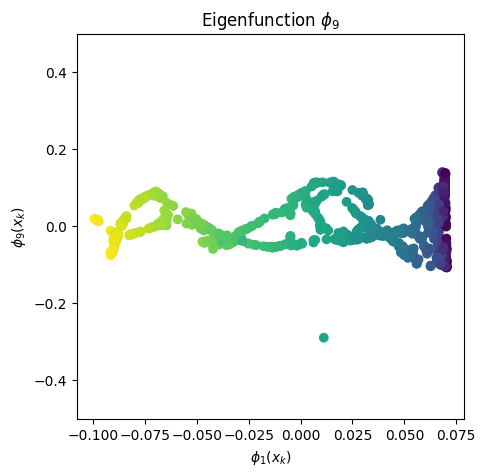

In [12]:
L = 10 #First 10 eigenvalues and eigenvectors
lambda_values, phi = diffusion_map(x_swiss_roll_1000, L = L)

#Plot the eigenfunctions against phi_1
plot_eigenfunctions(phi, t_swiss_roll_1000, L, save=True, filename="eigenfunctions_swiss_roll_1000", task=2)

Compute the three and two principal components of the swiss-roll dataset, and plot the reconstructed dataset, with 1000 data points.

Explained variance ratio for PC1: 0.3946
Explained variance ratio for PC2: 0.3237
Explained variance ratio for PC3: 0.2817


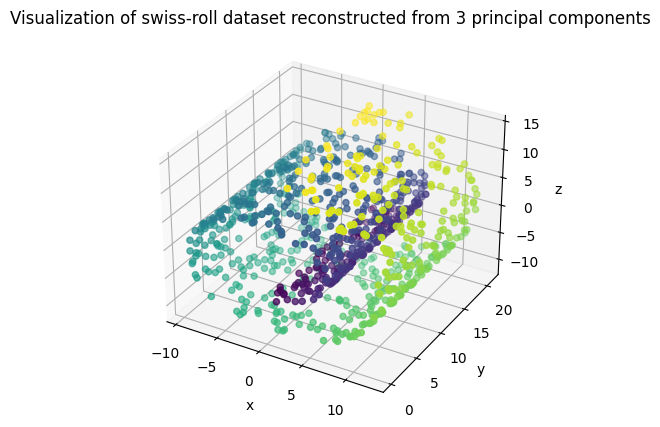

Explained variance ratio for PC1: 0.3946
Explained variance ratio for PC2: 0.3237


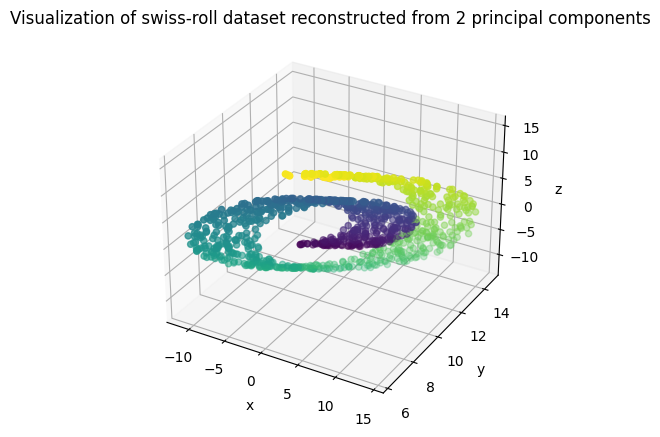

In [13]:
# Compute 3 principal components of the data set using PCA and reconstruct the data set
x_reconstructed = get_reconstructed_data_from_pca(x_swiss_roll_1000, 3)

#Plot of the reconstructed data set
plot_3d_data(x_reconstructed, t_swiss_roll_1000, title = 'Visualization of swiss-roll dataset reconstructed from 3 principal components', save=True, filename="reconstructed_swiss_roll_data_1000_3pc")

# Compute 2 principal components of the data set using PCA and reconstruct the data set
x_reconstructed = get_reconstructed_data_from_pca(x_swiss_roll_1000, 2)

#Plot of the reconstructed data set
plot_3d_data(x_reconstructed, t_swiss_roll_1000, title = 'Visualization of swiss-roll dataset reconstructed from 2 principal components', save=True, filename="reconstructed_swiss_roll_data_1000_2pc")

## Part three:

Concerns the trajectory data in the file data DMAP PCA vadere.txt on Moodle.
Perform the same analysis you did with PCA.


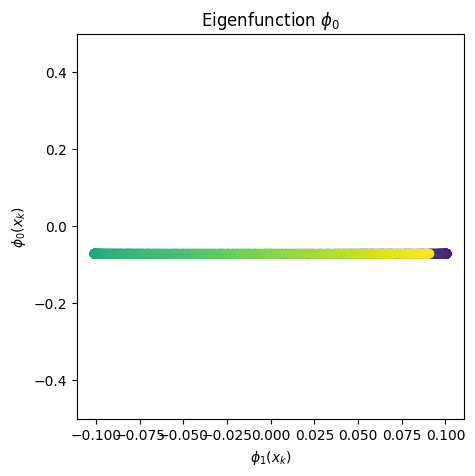

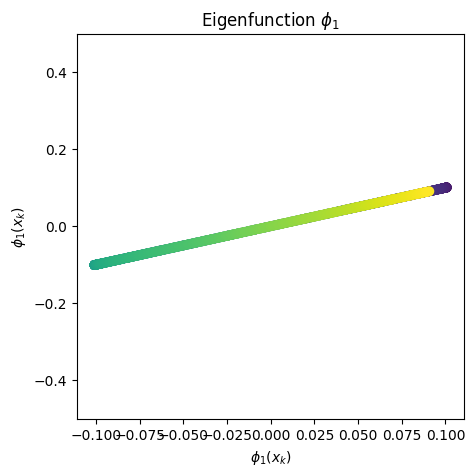

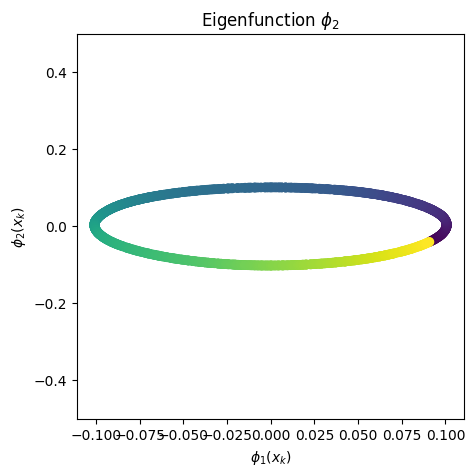

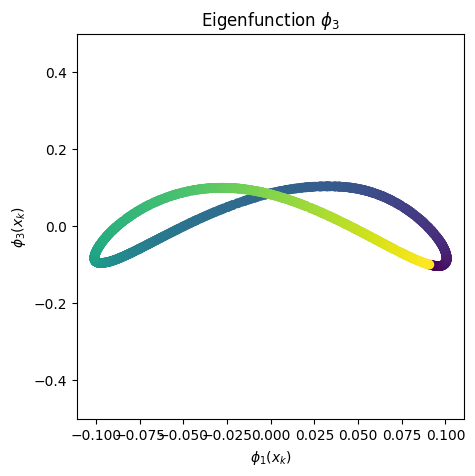

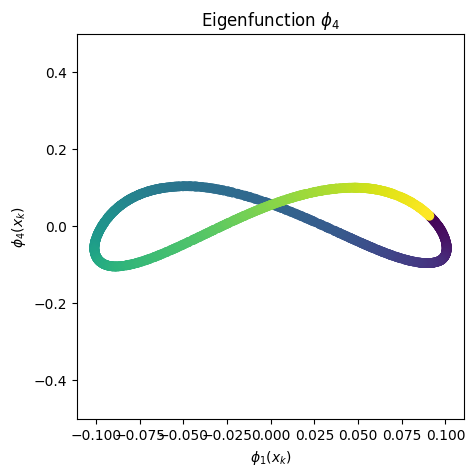

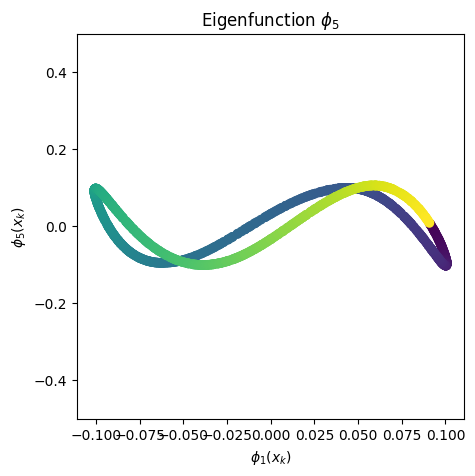

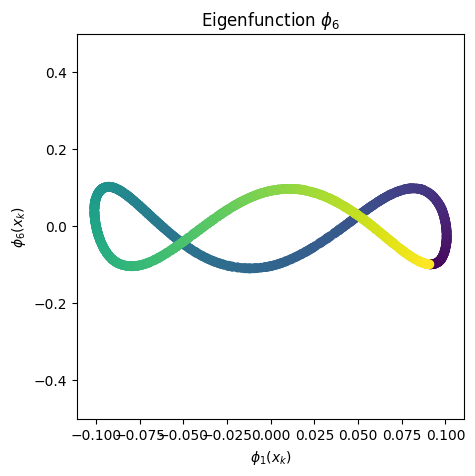

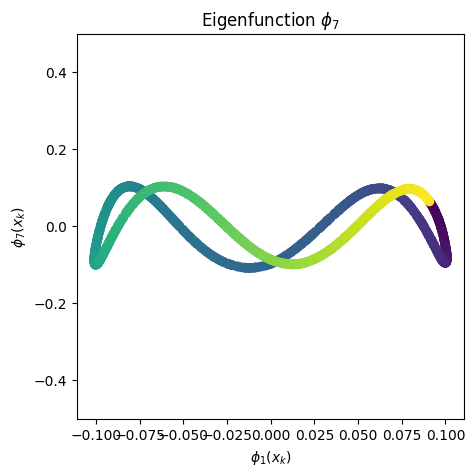

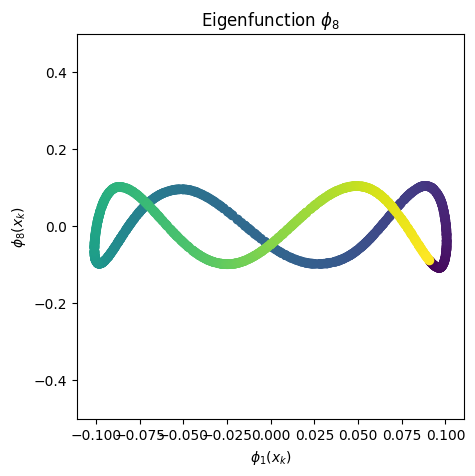

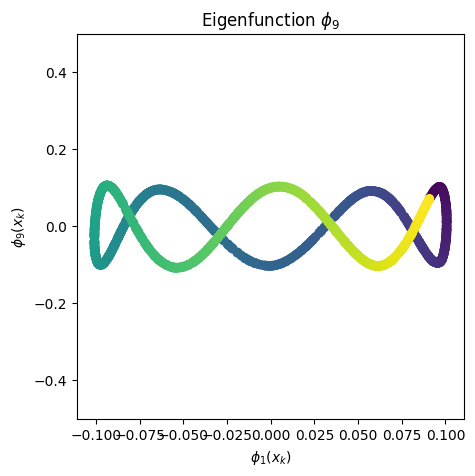

In [14]:
#Load the trajectories data
trajs = np.loadtxt("../data_DMAP_PCA_vadere.txt")
t_step = list(range(0, 1000))

#Compute the diffusion map for the dataset
L = 10 #First 10 eigenfunctions
lambda_values, phi = diffusion_map(trajs, L = L)

#Plot the eigenfunctions against phi_1
plot_eigenfunctions(phi, t_step, L, save=True, filename="eigenfunctions_trajectories", task=2)

## Part Four - Datafold Software (Bonus)
Download and install the datafold software8
, compute eigenvectors of the swiss roll data set
(see part two) and plot them against each other.

In [ ]:
from datafold.dynfold import LocalRegressionSelection
import datafold.dynfold as dfold
import datafold.pcfold as pfold
from datafold.utils.plot import plot_pairwise_eigenvector

#Use swiss roll data with 5000 data points
N=5000
idx_plot = np.random.permutation(N)[0:N]

# Optimize kernel parameters
X_pcm = pfold.PCManifold(x_swiss_roll)
X_pcm.optimize_parameters()

print(f"epsilon={X_pcm.kernel.epsilon}, cut-off={X_pcm.cut_off}")

dmap = dfold.DiffusionMaps(
    kernel=pfold.GaussianKernel(epsilon=X_pcm.kernel.epsilon),
    n_eigenpairs=9,
    dist_kwargs=dict(cut_off=X_pcm.cut_off),
)
dmap = dmap.fit(X_pcm)
evecs, evals = dmap.eigenvectors_, dmap.eigenvalues_

plot_pairwise_eigenvector(
    eigenvectors=dmap.eigenvectors_[idx_plot, :],
    n=1,
    fig_params=dict(figsize=[15, 15]),
    scatter_params=dict(cmap=plt.cm.Spectral, c=t[idx_plot]),
)

selection = LocalRegressionSelection(
    intrinsic_dim=2, n_subsample=500, strategy="dim"
).fit(dmap.eigenvectors_)
print(f"Found parsimonious eigenvectors (indices): {selection.evec_indices_}")